In [49]:
import pandas as pd
import datetime as dt
from matplotlib import pyplot as plt
import matplotlib
import scipy
import numpy as np
import seaborn as sns

In [50]:
CVD = pd.read_csv(r'C:\Users\rafid\OneDrive\Desktop\ML Project\Bangla.csv', encoding='latin-1')
print(CVD.dtypes)

date            object
 location       object
 new_cases       int64
 new_deaths      int64
 total_cases     int64
total_deaths     int64
dtype: object


In [52]:
CVD['date'] = [dt.datetime.strptime(x,'%m/%d/%Y') for x in CVD['date']]
print(CVD.dtypes)

date            datetime64[ns]
 location               object
 new_cases               int64
 new_deaths              int64
 total_cases             int64
total_deaths             int64
dtype: object


In [53]:
CVD.columns = ['Date', 'Country', 'New Cases', 'New deaths', 'Total Cases', 'Total Deaths' ]

In [54]:
CVD = CVD.copy()
CVD = pd.DataFrame(CVD.groupby(['Country', 'Date'])['Total Cases', 'Total Deaths'].sum()).reset_index()

<ipython-input-54-e3cca29f5a25>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  CVD = pd.DataFrame(CVD.groupby(['Country', 'Date'])['Total Cases', 'Total Deaths'].sum()).reset_index()


In [55]:
CVD = CVD.sort_values(by = ['Country','Date'], ascending=False)
print(CVD)

        Country       Date  Total Cases  Total Deaths
310  Bangladesh 2020-11-08       418764          6049
309  Bangladesh 2020-11-07       417475          6036
308  Bangladesh 2020-11-06       416006          6021
307  Bangladesh 2020-11-05       414164          6004
306  Bangladesh 2020-11-04       412647          5983
..          ...        ...          ...           ...
4    Bangladesh 2020-01-07            0             0
3    Bangladesh 2020-01-06            0             0
2    Bangladesh 2020-01-05            0             0
1    Bangladesh 2020-01-04            0             0
0    Bangladesh 2020-01-03            0             0

[311 rows x 4 columns]


In [59]:
def plot_exponential_fit_data(d_df, title, delta):
    d_df = d_df.sort_values(by=['Date'], ascending=True)
    d_df['x'] = np.arange(len(d_df)) + 1  #Add column x to the dataframe 
    d_df['y'] = d_df['Total Cases']   #Add column y to the dataframe 

    x = d_df['x'][:-delta]  #Remove delta number of data points (so we can predict them)
    y = d_df['y'][:-delta]  #Remove delta number of data points (so we can predict them)

#Use non-linear least squares to fit a function, f, to data.
#Let us fit data to exponential function: #y = Ae^(Bt)
    
    c2 = scipy.optimize.curve_fit(lambda t, a, b: a*np.exp(b*t),  x,  y,  p0=(20, 0.2)) 
# Function: lambda t, a, b: a*np.exp(b*t)
# xm y and po for initial values. 
    
    A, B = c2[0]  #Coefficients
    print(f'(y = Ae^(Bx)) A: {A}, B: {B}\n')
    x = range(1,d_df.shape[0] + 1)
    y_fit = A * np.exp(B * x)
#    print(y_fit)
    f, ax = plt.subplots(1,1, figsize=(12,6))
    g = sns.scatterplot(x=d_df['x'][:-delta], y=d_df['y'][:-delta], label='Confirmed cases (used for model creation)', color='red')
    g = sns.scatterplot(x=d_df['x'][-delta:], y=d_df['y'][-delta:], label='Confirmed cases (not used for model, va;idation)', color='blue')
    g = sns.lineplot(x=x, y=y_fit, label='Predicted values', color='green')  #Predicted
    x_future=range(300,305) #As of 24 March 2020 we have 85 days of info. 
    y_future=A * np.exp(B * x_future)
    print("Expected cases for the next 5 days: \n", y_future)
    plt.xlabel('Days since first case')
    plt.ylabel(f'Total cases')
    plt.title(f'Confirmed cases & projected cases: {title}')
    plt.xticks(rotation=90)
    ax.grid(color='black', linestyle='dotted', linewidth=0.75)
    plt.show()

In [60]:
CVD_BD = CVD[CVD['Country']=='Bangladesh']

(y = Ae^(Bx)) A: 4.0258865399296867e-13, B: 0.19999999905598817

Expected cases for the next 5 days: 
 [4.59759088e+13 5.61551017e+13 6.85879961e+13 8.37735675e+13
 1.02321266e+14]


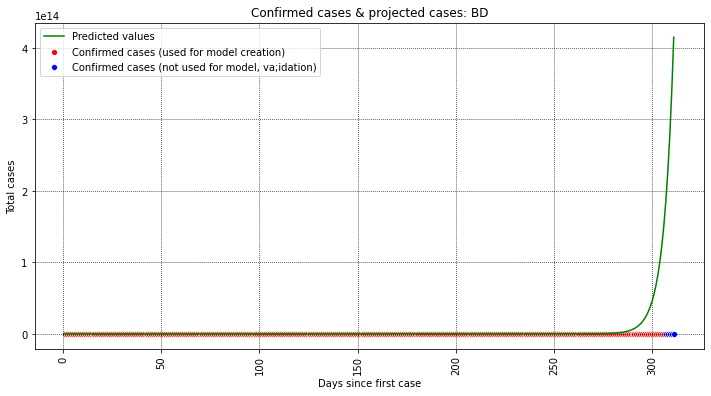

In [61]:
d_df = CVD_BD.copy()
plot_exponential_fit_data(d_df, 'BD', 5)